In [1054]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat

from spe_funcs import load_data

### Choose a file out of the files list to determine the fwhm on

In [1055]:
file = "data/Energiespektrum-Na22-BaF2-300s.Spe"

In [1056]:
data, roi = load_data(file, only_roi=False)
roi = np.arange(4500, 5800)
data = data[roi]

In [1057]:
data_stds = 0.01 * data

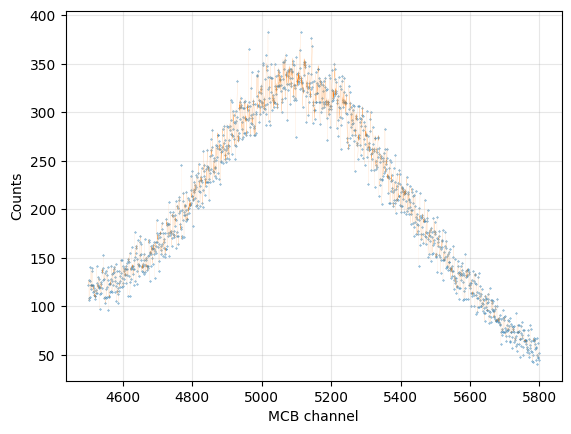

In [1058]:
plt.scatter(roi, data, s=0.1)
plt.fill_between(roi, data - data_stds, data + data_stds)
plt.grid(alpha=.3)
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [1059]:
from lmfit.models import GaussianModel, LinearModel

peak = GaussianModel()
background = LinearModel()
model = peak + background

In [1060]:
init_values = {
    'amplitude': {'value': max(data) - min(data), 'min': 0},
    'center': {'value': roi[np.where(data == max(data))[0][0]], 'min': roi[0], 'max': roi[-1]},
    'sigma': {'value': 200, 'min': 0, 'max': 1000},
    'slope': {'value': -1, 'min': -10, 'max': 0},
    'intercept': {'value': 500, 'min': 0, 'max': 5000},
}
params = model.make_params(**init_values)
params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude       342        0      inf     None     True     None     None
center         5018     4500     5799     None     True     None     None
fwhm            471     -inf      inf     None    False 2.3548200*sigma     None
height       0.6822     -inf      inf     None    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept       500        0     5000     None     True     None     None
sigma           200        0     1000     None     True     None     None
slope            -1      -10        0     None     True     None     None


In [1061]:
result = model.fit(data, params, x=list(roi), weights=1. / data_stds)
result.params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.904e+05        0      inf     2515     True     None     None
center         5130     4500     5799    1.912     True     None     None
fwhm          680.7     -inf      inf    6.339    False 2.3548200*sigma     None
height        262.8     -inf      inf    1.681    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept     260.4        0     5000    8.435     True     None     None
sigma           289        0     1000    2.692     True     None     None
slope      -0.03875      -10        0 0.001429     True     None     None


In [1062]:
fitted_params = result.params
x = np.linspace(min(roi), max(roi), 1000)
y = model.eval(x=x, params=fitted_params)

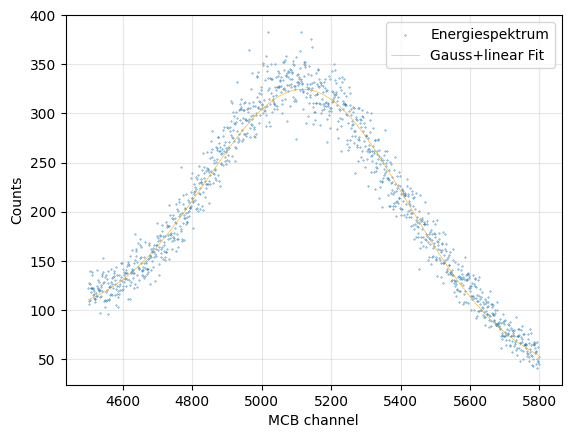

In [1063]:
plt.scatter(roi, data, s=0.1, label='Energiespektrum')
plt.plot(x, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [1064]:
centerone = ufloat(fitted_params['center'].value, fitted_params['center'].stderr)
print(centerone)

5130.2+/-1.9


In [1065]:
data, roi = load_data(file, only_roi=False)
roi = np.arange(1700, 2400)
data = data[roi]

In [1066]:
data_stds = 0.01 * data

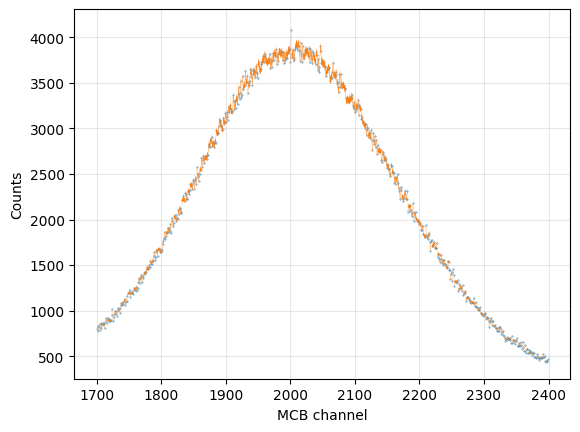

In [1067]:
plt.scatter(roi, data, s=0.1)
plt.fill_between(roi, data - data_stds, data + data_stds)
plt.grid(alpha=.3)
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [1068]:
from lmfit.models import GaussianModel, LinearModel

peak = GaussianModel()
background = LinearModel()
model = peak + background

In [1069]:
init_values = {
    'amplitude': {'value': max(data) - min(data), 'min': 0},
    'center': {'value': roi[np.where(data == max(data))[0][0]], 'min': roi[0], 'max': roi[-1]},
    'sigma': {'value': 100, 'min': 0, 'max': 1000},
    'slope': {'value': -1, 'min': -10, 'max': 0},
    'intercept': {'value': 500, 'min': 0, 'max': 5000},
}
params = model.make_params(**init_values)
params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude      3639        0      inf     None     True     None     None
center         2001     1700     2399     None     True     None     None
fwhm          235.5     -inf      inf     None    False 2.3548200*sigma     None
height        14.52     -inf      inf     None    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept       500        0     5000     None     True     None     None
sigma           100        0     1000     None     True     None     None
slope            -1      -10        0     None     True     None     None


In [1070]:
result = model.fit(data, params, x=list(roi), weights=1. / data_stds)
result.params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.372e+06        0      inf     6621     True     None     None
center         2010     1700     2399   0.4043     True     None     None
fwhm          365.7     -inf      inf    1.233    False 2.3548200*sigma     None
height         3525     -inf      inf    8.695    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept     311.4        0     5000    36.61     True     None     None
sigma         155.3        0     1000   0.5235     True     None     None
slope      -4.319e-10      -10        0  0.03618     True     None     None


In [1071]:
fitted_params = result.params
x = np.linspace(min(roi), max(roi), 1000)
y = model.eval(x=x, params=fitted_params)

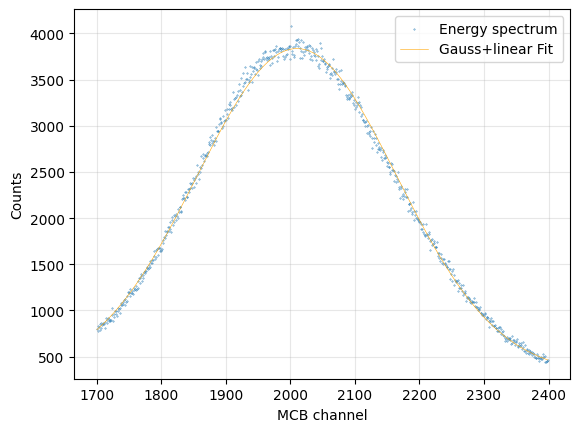

In [1072]:
plt.scatter(roi, data, s=0.1, label='Energy spectrum')
plt.plot(x, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [1073]:
centertwo = ufloat(fitted_params['center'].value, fitted_params['center'].stderr)
print(centerone)

5130.2+/-1.9


In [1074]:
resolution = abs((1274.542 - 511) / (centerone - centertwo))
print(f'Resolution: {resolution} keV/channel')
diff = centertwo * resolution - 511
print(centerone * resolution - 1274.542)
print(diff)
print(f'Both diff equal?: {diff == centerone * resolution - 1274.542}')
if diff != centerone * resolution - 1274.542:
    print(diff - (centerone * resolution - 1274.542))

Resolution: 0.24471+/-0.00015 keV/channel
-19.15+/-0.34
-19.15+/-0.34
Both diff equal?: False
(0+/-5)e-17


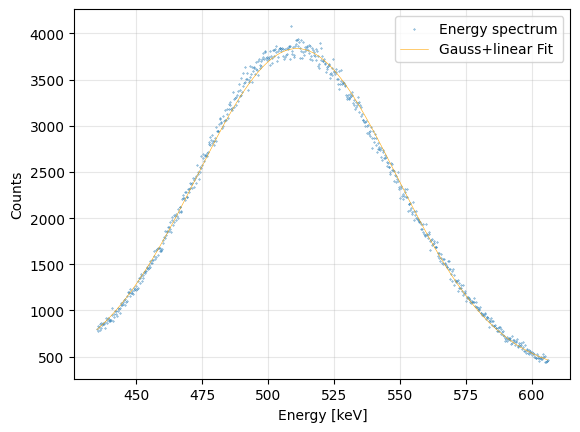

In [1075]:
plt.scatter(roi * resolution.n - diff.n, data, s=0.1, label='Energy spectrum')
plt.plot(x * resolution.n - diff.n, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

In [1076]:
print(f'Energy resolution of BAF2 detector: {resolution} * x + {diff} keV/channel')

Energy resolution of BAF2 detector: 0.24471+/-0.00015 * x + -19.15+/-0.34 keV/channel


In [1077]:
print(f"check peaks: {centerone * resolution.n - diff.n} & {centertwo * resolution.n - diff.n}")

check peaks: 1274.5+/-0.5 & 511.00+/-0.10
